As a first step, we will start by importing the necessary modules to work.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate
import joblib
import sys
sys.path.append('../utils')
from utils import continent, del_cols, dummies


ModuleNotFoundError: No module named 'matplotlib'

Subsequently, I will organize the 5 csv's as dataframes to work with, in order to make an exploratory analysis of the data.

### 2015 CSV

In [ ]:
df2015=pd.read_csv("../Data/2015.csv")
df2015.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [ ]:
df2015.shape

(158, 12)

We can see that our dataset has 158 rows and 12 columns.

Now, let's see what kind of data we have:

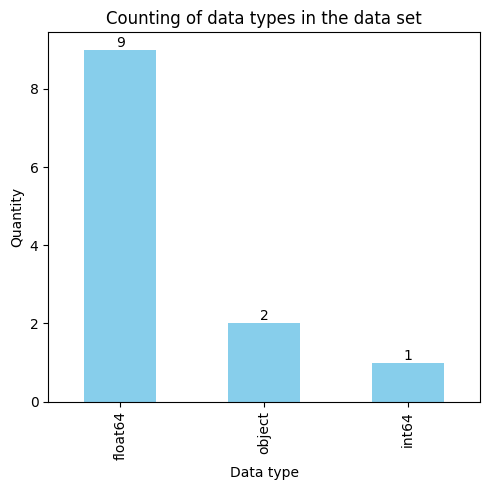

In [ ]:
data_types_counts = df2015.dtypes.value_counts()


colors = ['skyblue']

plt.figure(figsize=(5, 5))
bar_plot = data_types_counts.plot(kind='bar', color=colors)

plt.xlabel('Data type')
plt.ylabel('Quantity')
plt.title('Counting of data types in the data set')


for i, value in enumerate(data_types_counts):
    plt.text(i, value + 0, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Most of our data are of type “float”, and that has logic, because when we did “.head()” we realized that many columns had floating values.

In [ ]:
df2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

Now, I performed an “.info()” to see which columns these data types belonged to, and also to see if they had null values or not. Where we can see that we do not have null values, and the only integer column is “happiness_rank”.

In [ ]:
df2015.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

With the above, I wanted to see how many unique values I had, where an important finding was that the regions are repeated throughout the dataset, as we only have 10 regions.

In [ ]:
df2015['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [ ]:
df2015.loc[df2015.duplicated()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


We can see that we do not have duplicate values in this dataset, something really significant because, at the time of transformations, this will not be one of them.

In [ ]:
df2015.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,158.0,79.493671,45.754363,1.00000,40.250000,79.500000,118.750000,158.00000
Happiness Score,158.0,5.375734,1.145010,2.83900,4.526000,5.232500,6.243750,7.58700
Standard Error,158.0,0.047885,0.017146,0.01848,0.037268,0.043940,0.052300,0.13693
Economy (GDP per Capita),158.0,0.846137,0.403121,0.00000,0.545808,0.910245,1.158448,1.69042
Family,158.0,0.991046,0.272369,0.00000,0.856823,1.029510,1.214405,1.40223
Health (Life Expectancy),158.0,0.630259,0.247078,0.00000,0.439185,0.696705,0.811013,1.02525
Freedom,158.0,0.428615,0.150693,0.00000,0.328330,0.435515,0.549092,0.66973
Trust (Government Corruption),158.0,0.143422,0.120034,0.00000,0.061675,0.107220,0.180255,0.55191
Generosity,158.0,0.237296,0.126685,0.00000,0.150553,0.216130,0.309883,0.79588
Dystopia Residual,158.0,2.098977,0.553550,0.32858,1.759410,2.095415,2.462415,3.60214


- Happiness Rank:
        The mean happiness rank is approximately 79.49, suggesting that most countries have a moderate happiness rank compared to other countries.
        The wide standard deviation of approximately 45.75 indicates a large variability in the range of happiness across countries. This may be due to differences in factors such as economic development, quality of life, political stability and other social aspects that influence the perception of happiness.

- Happiness Score:
        The mean happiness score is about 5.38, suggesting that average happiness is in the middle range.
        However, the relatively high standard deviation of about 1.15 indicates that there is significant variability in happiness scores across countries. Cultural, social and economic differences between countries may influence the perceived happiness of their citizens.

- Trust (Government Corruption):
        The mean of trust in government is approximately 0.14, with a standard deviation of 0.12, suggesting moderate variability in trust in government across countries. Perceptions of government corruption may be influenced by factors such as government transparency, the effectiveness of anti-corruption institutions, and a country's political culture.

- Economy (GDP per Capita):
        The mean GDP per capita is approximately 0.85, with a standard deviation of approximately 0.40, indicating significant variability in GDP per capita across countries. The difference in economic development between countries may be a key reason behind this variability, with factors such as industrial production, employment, foreign investment and wealth distribution influencing GDP per capita.

These interpretations suggest that a variety of socioeconomic and political factors may influence perceptions of happiness and trust in government in different countries, resulting in significant variability in the observed data.

### 2016 CSV

In [ ]:
df2016=pd.read_csv("../Data/2016.csv")
df2016.head(5)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [ ]:
df2016.shape

(157, 13)

We can see that our dataset has 158 rows and 12 columns.

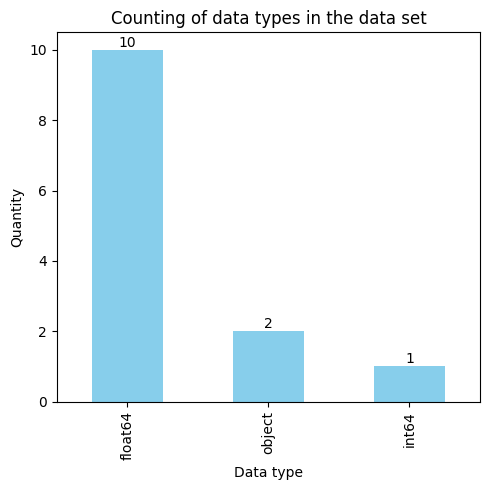

In [ ]:
data_types_counts = df2016.dtypes.value_counts()


colors = ['skyblue']

plt.figure(figsize=(5, 5))
bar_plot = data_types_counts.plot(kind='bar', color=colors)

plt.xlabel('Data type')
plt.ylabel('Quantity')
plt.title('Counting of data types in the data set')


for i, value in enumerate(data_types_counts):
    plt.text(i, value + 0, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
df2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

We can see that we have no null values in our dataset.

In [ ]:
df2016.nunique()

Country                          157
Region                            10
Happiness Rank                   154
Happiness Score                  154
Lower Confidence Interval        154
Upper Confidence Interval        154
Economy (GDP per Capita)         157
Family                           157
Health (Life Expectancy)         156
Freedom                          157
Trust (Government Corruption)    156
Generosity                       157
Dystopia Residual                157
dtype: int64

With the above, I wanted to see how many unique values I had, where an important finding was that the regions are repeated throughout the dataset, as we only have 10 regions.

In [ ]:
df2016['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [ ]:
df2016.loc[df2016.duplicated()]

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


As we can see, there are no duplicate values.

In [ ]:
df2016.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,157.0,78.980892,45.466030,1.00000,40.00000,79.00000,118.00000,157.00000
Happiness Score,157.0,5.382185,1.141674,2.90500,4.40400,5.31400,6.26900,7.52600
Lower Confidence Interval,157.0,5.282395,1.148043,2.73200,4.32700,5.23700,6.15400,7.46000
Upper Confidence Interval,157.0,5.481975,1.136493,3.07800,4.46500,5.41900,6.43400,7.66900
Economy (GDP per Capita),157.0,0.953880,0.412595,0.00000,0.67024,1.02780,1.27964,1.82427
Family,157.0,0.793621,0.266706,0.00000,0.64184,0.84142,1.02152,1.18326
Health (Life Expectancy),157.0,0.557619,0.229349,0.00000,0.38291,0.59659,0.72993,0.95277
Freedom,157.0,0.370994,0.145507,0.00000,0.25748,0.39747,0.48453,0.60848
Trust (Government Corruption),157.0,0.137624,0.111038,0.00000,0.06126,0.10547,0.17554,0.50521
Generosity,157.0,0.242635,0.133756,0.00000,0.15457,0.22245,0.31185,0.81971


These are some of the findings I was able to interpret:

- Happiness Rank:
The average happiness rank is similar to the previous year, around 79. The standard deviation suggests significant variability in the range of happiness across countries, similar to the previous year.

- Happiness Score:
The average happiness score is comparable to the previous year, around 5.38.
The standard deviation suggests significant variability in happiness scores across countries, similar to the previous year.

- Trust in Government:
Trust in government is also similar to the previous year, with a mean close to 0.14 and a moderate standard deviation. This suggests relative stability in the perception of government corruption among countries compared to the previous year.

- GDP per Capita:
Average GDP per capita increased compared to the previous year, being approximately 0.95. This could indicate overall economic growth or changes in the distribution of wealth among countries in 2016.

- Health - Life Expectancy:
Average life expectancy is lower than the previous year, averaging around 0.56. This decline could reflect health problems or changes in medical care in some countries during 2016.

### 2017 CSV

In [ ]:
df2017=pd.read_csv("../Data/2017.csv")
df2017.head(5)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [ ]:
df2017.shape

(155, 12)

We can see that our dataset has 155 rows and 12 columns.

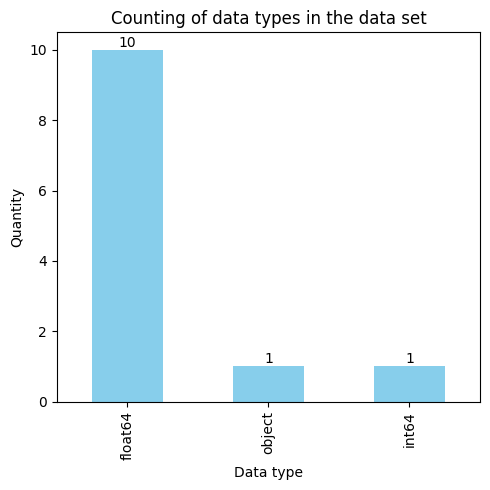

In [ ]:
data_types_counts = df2017.dtypes.value_counts()

colors = ['skyblue']

plt.figure(figsize=(5, 5))
bar_plot = data_types_counts.plot(kind='bar', color=colors)

plt.xlabel('Data type')
plt.ylabel('Quantity')
plt.title('Counting of data types in the data set')

for i, value in enumerate(data_types_counts):
    plt.text(i, value + 0, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

We have most of the columns of type “float”.

In [ ]:
df2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

Here we can see what type of data belongs to each column, where we also notice that we do not have null values.

In [ ]:
df2017.nunique()

Country                          155
Happiness.Rank                   155
Happiness.Score                  151
Whisker.high                     155
Whisker.low                      155
Economy..GDP.per.Capita.         155
Family                           155
Health..Life.Expectancy.         155
Freedom                          155
Generosity                       155
Trust..Government.Corruption.    155
Dystopia.Residual                155
dtype: int64

Here we can see that the “happiness score” column gives us 151 unique values compared to the other columns where the values are not repeated. Another finding is that the column “region” is not found in this dataset. Later we will see what we can do here for concatenation.

In [ ]:
df2017.loc[df2017.duplicated()]

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual


We do NOT have duplicate rows.

In [ ]:
df2017.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness.Rank,155.0,78.000000,44.888751,1.000000,39.500000,78.000000,116.500000,155.000000
Happiness.Score,155.0,5.354019,1.131230,2.693000,4.505500,5.279000,6.101500,7.537000
Whisker.high,155.0,5.452326,1.118542,2.864884,4.608172,5.370032,6.194600,7.622030
Whisker.low,155.0,5.255713,1.145030,2.521116,4.374955,5.193152,6.006527,7.479556
Economy..GDP.per.Capita.,155.0,0.984718,0.420793,0.000000,0.663371,1.064578,1.318027,1.870766
Family,155.0,1.188898,0.287263,0.000000,1.042635,1.253918,1.414316,1.610574
Health..Life.Expectancy.,155.0,0.551341,0.237073,0.000000,0.369866,0.606042,0.723008,0.949492
Freedom,155.0,0.408786,0.149997,0.000000,0.303677,0.437454,0.516561,0.658249
Generosity,155.0,0.246883,0.134780,0.000000,0.154106,0.231538,0.323762,0.838075
Trust..Government.Corruption.,155.0,0.123120,0.101661,0.000000,0.057271,0.089848,0.153296,0.464308


- Happiness Rank:
        The happiness rank has a mean of about 78 with a standard deviation of about 44.89, indicating a large dispersion in happiness ranking among countries.
        The interquartile range (IQR) is 77 units, suggesting that 50% of the countries have a happiness rank within this range.

- Happiness Score:
        The happiness score has a mean of about 5.35 with a standard deviation of about 1.13, indicating considerable variability in happiness across countries.
        The IQR is about 1.60 units, suggesting that half of the countries have a happiness score within this range.

- Economy (GDP per Capita):
        GDP per capita has a mean of about 0.98 with a standard deviation of about 0.42, indicating significant variability in economic development across countries.
        The IQR is about 0.65 units, suggesting that 50% of the countries have a GDP per capita within this range.

- Health (Life Expectancy):
Life expectancy has a mean of about 0.55 with a standard deviation of about 0.24, indicating variability across countries in terms of health and well-being.
    The IQR is about 0.35 units, suggesting that half of the countries have a life expectancy within this range.



### 2018 CSV

In [ ]:
df2018=pd.read_csv("../Data/2018.csv")
df2018.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


One finding I was able to make, was that we do not have the “region” column directly, but it is called “Country or region”; but later we will see what we can do with this.

In [ ]:
df2018.shape

(156, 9)

We can see that our dataset has 156 rows and 9 columns.

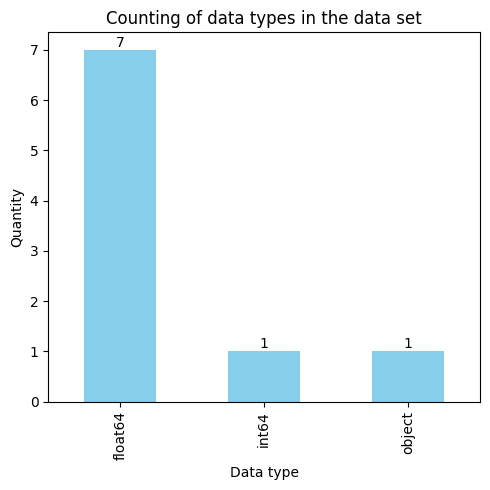

In [ ]:
data_types_counts = df2018.dtypes.value_counts()

colors = ['skyblue']

plt.figure(figsize=(5, 5))
bar_plot = data_types_counts.plot(kind='bar', color=colors)

plt.xlabel('Data type')
plt.ylabel('Quantity')
plt.title('Counting of data types in the data set')

for i, value in enumerate(data_types_counts):
    plt.text(i, value + 0, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

We have most of the columns of type “float”.

In [ ]:
df2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


We can see that we have a null value in the column “Perceptions of corruption”, let's see which row it is.

In [ ]:
null_rows = df2018[df2018['Perceptions of corruption'].isnull()]
null_rows

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


Let's eliminate that row with null value, since it is not convenient to have null values in our project for the construction of the model:

In [ ]:
df2018 = df2018.dropna(subset=['Perceptions of corruption'])
print("The row was deleted perfectly!")

The row was deleted perfectly!


Now, let's look at our descriptive analysis by columns:

In [ ]:
df2018.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall rank,155.0,78.877419,45.076463,1.000,40.5000,79.000,117.5000,156.000
Score,155.0,5.366897,1.117433,2.905,4.4515,5.358,6.1540,7.632
GDP per capita,155.0,0.883677,0.380942,0.000,0.6125,0.940,1.1925,1.649
Social support,155.0,1.216058,0.301286,0.000,1.0755,1.258,1.4640,1.644
Healthy life expectancy,155.0,0.596877,0.248312,0.000,0.4205,0.643,0.7785,1.030
Freedom to make life choices,155.0,0.455606,0.162367,0.000,0.3575,0.493,0.5790,0.724
Generosity,155.0,0.180974,0.098789,0.000,0.1090,0.173,0.2400,0.598
Perceptions of corruption,155.0,0.112000,0.096492,0.000,0.0510,0.082,0.1370,0.457


- Overall Rank:
        The overall rank has a mean of about 78.88 with a standard deviation of about 45.08, indicating wide variability in the overall rank among countries.
        The interquartile range (IQR) is 77 units, suggesting that 50% of the countries have an overall rank within this range.

- Happiness Score:
        The happiness score has a mean of about 5.37 with a standard deviation of about 1.12, indicating considerable variability in happiness across countries.
        The IQR is about 1.70 units, suggesting that half of the countries have a happiness score within this range.

- GDP per Capita:
        GDP per capita has a mean of about 0.88 with a standard deviation of about 0.38, indicating significant variability in economic development across countries.
        The IQR is about 0.58 units, suggesting that 50% of the countries have GDP per capita within this range.

- Social Support:
        Social support has a mean of about 1.22 with a standard deviation of about 0.30, indicating variability in social support across countries.
        The IQR is about 0.39 units, suggesting that half of the countries have a level of social support within this range.

### 2019 CSV

In [ ]:
df2019=pd.read_csv("../Data/2019.csv")
df2019.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


As in the previous csv we can see the column “Country or region” in this dataset.

In [ ]:
df2019.shape

(156, 9)

We can see that our dataset has 156 rows and 9 columns.

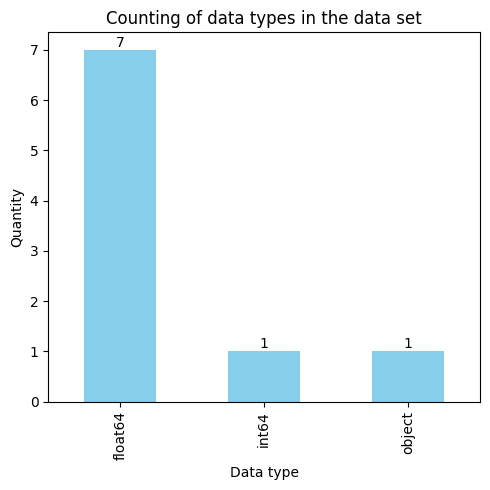

In [ ]:
data_types_counts = df2019.dtypes.value_counts()

colors = ['skyblue']

plt.figure(figsize=(5, 5))
bar_plot = data_types_counts.plot(kind='bar', color=colors)

plt.xlabel('Data type')
plt.ylabel('Quantity')
plt.title('Counting of data types in the data set')

for i, value in enumerate(data_types_counts):
    plt.text(i, value + 0, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
df2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


There are no null values, which is really significant, and we can see to which column each data type belongs.

In [ ]:
df2019.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall rank,156.0,78.500000,45.177428,1.000,39.75000,78.5000,117.25000,156.000
Score,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769
GDP per capita,156.0,0.905147,0.398389,0.000,0.60275,0.9600,1.23250,1.684
Social support,156.0,1.208814,0.299191,0.000,1.05575,1.2715,1.45250,1.624
Healthy life expectancy,156.0,0.725244,0.242124,0.000,0.54775,0.7890,0.88175,1.141
Freedom to make life choices,156.0,0.392571,0.143289,0.000,0.30800,0.4170,0.50725,0.631
Generosity,156.0,0.184846,0.095254,0.000,0.10875,0.1775,0.24825,0.566
Perceptions of corruption,156.0,0.110603,0.094538,0.000,0.04700,0.0855,0.14125,0.453


- Overall Rank:
        The overall rank has a mean of about 78.5 with a standard deviation of about 45.18, indicating wide variability in the overall rank among countries.
        The interquartile range (IQR) is 77.5 units, suggesting that 50% of the countries have an overall rank within this range.

- Happiness Score:
        The happiness score has a mean of about 5.41 with a standard deviation of about 1.11, indicating considerable variability in happiness across countries.
        The IQR is about 1.64 units, suggesting that half of the countries have a happiness score within this range.

- GDP per Capita:
        GDP per capita has a mean of about 0.91 with a standard deviation of about 0.40, indicating significant variability in economic development across countries.
        The IQR is about 0.63 units, suggesting that 50% of the countries have GDP per capita within this range.

- Social Support:
        Social support has a mean of about 1.21 with a standard deviation of about 0.30, indicating variability in social support across countries.
        The IQR is about 0.40 units, suggesting that half of the countries have a level of social support within this range.

#### Conclusions after EDA by csv's:

We were able to observe that in the 5 csv's studied, we found different values for the variables studied. Now I will make a comparison between columns of the datasets, to see how the respective merge could be done, and that of course, does not cause us conflict so that our data are in the least way to work.

#### Analysis of the Columns:

First, let's look at a comparison between dimensions of each:

In [ ]:
dfs = {
    'df2015': df2015,
    'df2016': df2016,
    'df2017': df2017,
    'df2018': df2018,
    'df2019': df2019
}

def get_shapes_compare(dfs):
    shape_info = [] 

    for dataset_name, dataset in dfs.items():
        shape = dataset.shape
        shape_info.append({
            'Dataset': dataset_name,
            'Number of rows': shape[0],
            'Number of columns': shape[1]
        })

    dfshapes = pd.DataFrame(shape_info)
    return dfshapes

dfshapes = get_shapes_compare(dfs)
shapes_compare = tabulate(dfshapes, headers='keys', tablefmt='pretty', showindex=False)
print(shapes_compare)

+---------+----------------+-------------------+
| Dataset | Number of rows | Number of columns |
+---------+----------------+-------------------+
| df2015  |      158       |        12         |
| df2016  |      157       |        13         |
| df2017  |      155       |        12         |
| df2018  |      155       |         9         |
| df2019  |      156       |         9         |
+---------+----------------+-------------------+


As we can see, the last two years have fewer columns. This finding is super important, because then we can see the comparison of all the columns to see how we rename and what we remove to make a successful merge.

Now, let's see what columns we have per dataset. This in order to identify which are common and which are not, so we can eliminate those that do not contribute to our project:

In [ ]:
columns_df2015 = list(df2015.columns)
columns_df2016 = list(df2016.columns)
columns_df2017 = list(df2017.columns)
columns_df2018 = list(df2018.columns)
columns_df2019 = list(df2019.columns)

max = max(len(columns) for columns in [columns_df2015, columns_df2016, columns_df2017, columns_df2018, columns_df2019])
for columns in [columns_df2015, columns_df2016, columns_df2017, columns_df2018, columns_df2019]:
    while len(columns) < max:
        columns.append(None)

data = {
    'df2015': columns_df2015,
    'df2016': columns_df2016,
    'df2017': columns_df2017,
    'df2018': columns_df2018,
    'df2019': columns_df2019
}
columns_df = pd.DataFrame(data)
columns_df


,df2015,df2016,df2017,df2018,df2019
0,Country,Country,Country,Overall rank,Overall rank
1,Region,Region,Happiness.Rank,Country or region,Country or region
2,Happiness Rank,Happiness Rank,Happiness.Score,Score,Score
3,Happiness Score,Happiness Score,Whisker.high,GDP per capita,GDP per capita
4,Standard Error,Lower Confidence Interval,Whisker.low,Social support,Social support
5,Economy (GDP per Capita),Upper Confidence Interval,Economy..GDP.per.Capita.,Healthy life expectancy,Healthy life expectancy
6,Family,Economy (GDP per Capita),Family,Freedom to make life choices,Freedom to make life choices
7,Health (Life Expectancy),Family,Health..Life.Expectancy.,Generosity,Generosity
8,Freedom,Health (Life Expectancy),Freedom,Perceptions of corruption,Perceptions of corruption
9,Trust (Government Corruption),Freedom,Generosity,None,None


We observe that the columns shared across all datasets include: Country, happiness score, GDP per capita, Life expectancy, freedom, generosity, and trust/government corruption. The columns slated for removal prior to merging are: Region, Standard Error (found in the 2015 dataset), Family and Dystopia residual (absent in the 2018 and 2019 datasets), whisker high and low (included in the 2017 dataset), social support (present in both the 2018 and 2019 datasets), Lower confidence interval, and Upper confidence interval (the latter two are present in the 2016 dataset).

##### We will eliminate the columns mentioned above:

In [ ]:
df2015.drop(columns=['Region', 'Standard Error', 'Family', 'Dystopia Residual'], inplace=True)
df2016.drop(columns=['Region', 'Family', 'Dystopia Residual', 'Lower Confidence Interval', 'Upper Confidence Interval'], inplace=True)
df2017.drop(columns=['Whisker.high', 'Family','Whisker.low', 'Dystopia.Residual'], inplace=True)
df2018.drop(columns=['Social support'], inplace=True)
df2019.drop(columns=['Social support'], inplace=True)

Here, we add the column “year” to our merge:

In [ ]:
df2015['year'] = 2015
df2016['year'] = 2016
df2017['year'] = 2017
df2018['year'] = 2018
df2019['year'] = 2019

##### Let's rename the columns we will work with:

In [ ]:
df15_df16 = {'year':'year','Economy (GDP per Capita)': 'gdp_per_capita',
         'Trust (Government Corruption)': 'government_corruption', 'Country': 'country', 'Happiness Rank': 'happiness_rank', 
         'Happiness Score': 'happiness_score', 'Freedom': 'freedom', 'Generosity': 'generosity', 'Health (Life Expectancy)': 'healthy_life_expectancy' }
df2015 = df2015.rename(columns=df15_df16)
df2016 = df2016.rename(columns=df15_df16)

In [ ]:
df17 = {'year':'year','Happiness.Rank': 'happiness_rank', 'Happiness.Score': 'happiness_score', 
         'Economy..GDP.per.Capita.': 'gdp_per_capita', 'Health..Life.Expectancy.' : 'healthy_life_expectancy',
         'Trust..Government.Corruption.': 'government_corruption', 'Country':'country', 'Freedom': 'freedom', 'Generosity': 'generosity'}
df2017 = df2017.rename(columns=df17)

In [ ]:
df18_df19 = {'year':'year','Overall rank': 'happiness_rank', 'Country or region': 'country', 'Score': 'happiness_score',
         'Healthy life expectancy' : 'healthy_life_expectancy', 'Freedom to make life choices': 'freedom', 
         'Perceptions of corruption': 'government_corruption', 'GDP per capita': 'gdp_per_capita', 'Generosity': 'generosity'}
df2018 = df2018.rename(columns=df18_df19)
df2019 = df2019.rename(columns=df18_df19)

##### We verify:

In [ ]:
list = [df2015, df2016, df2017, df2018, df2019]
for dfs in list:
    print(dfs.columns)

Index(['country', 'happiness_rank', 'happiness_score', 'gdp_per_capita',
       'healthy_life_expectancy', 'freedom', 'government_corruption',
       'generosity', 'year'],
      dtype='object')
Index(['country', 'happiness_rank', 'happiness_score', 'gdp_per_capita',
       'healthy_life_expectancy', 'freedom', 'government_corruption',
       'generosity', 'year'],
      dtype='object')
Index(['country', 'happiness_rank', 'happiness_score', 'gdp_per_capita',
       'healthy_life_expectancy', 'freedom', 'generosity',
       'government_corruption', 'year'],
      dtype='object')
Index(['happiness_rank', 'country', 'happiness_score', 'gdp_per_capita',
       'healthy_life_expectancy', 'freedom', 'generosity',
       'government_corruption', 'year'],
      dtype='object')
Index(['happiness_rank', 'country', 'happiness_score', 'gdp_per_capita',
       'healthy_life_expectancy', 'freedom', 'generosity',
       'government_corruption', 'year'],
      dtype='object')


##### Merge 

In [ ]:
common_columns = ['year','happiness_rank', 'country', 'happiness_score', 'gdp_per_capita','healthy_life_expectancy', 'freedom', 'generosity','government_corruption'] 
df = pd.concat([df2015, df2016, df2017, df2018, df2019], ignore_index=True)
df = df.reindex(columns=common_columns)
df.head(5)

,year,happiness_rank,country,happiness_score,gdp_per_capita,healthy_life_expectancy,freedom,generosity,government_corruption
0,2015,1,Switzerland,7.587,1.39651,0.94143,0.66557,0.29678,0.41978
1,2015,2,Iceland,7.561,1.30232,0.94784,0.62877,0.43630,0.14145
2,2015,3,Denmark,7.527,1.32548,0.87464,0.64938,0.34139,0.48357
3,2015,4,Norway,7.522,1.45900,0.88521,0.66973,0.34699,0.36503
4,2015,5,Canada,7.427,1.32629,0.90563,0.63297,0.45811,0.32957


#### EDA per Merge

In [ ]:
df

,year,happiness_rank,country,happiness_score,gdp_per_capita,healthy_life_expectancy,freedom,generosity,government_corruption
0,2015,1,Switzerland,7.587,1.39651,0.94143,0.66557,0.29678,0.41978
1,2015,2,Iceland,7.561,1.30232,0.94784,0.62877,0.43630,0.14145
2,2015,3,Denmark,7.527,1.32548,0.87464,0.64938,0.34139,0.48357
3,2015,4,Norway,7.522,1.45900,0.88521,0.66973,0.34699,0.36503
4,2015,5,Canada,7.427,1.32629,0.90563,0.63297,0.45811,0.32957
...,...,...,...,...,...,...,...,...,...
776,2019,152,Rwanda,3.334,0.35900,0.61400,0.55500,0.21700,0.41100
777,2019,153,Tanzania,3.231,0.47600,0.49900,0.41700,0.27600,0.14700
778,2019,154,Afghanistan,3.203,0.35000,0.36100,0.00000,0.15800,0.02500
779,2019,155,Central African Republic,3.083,0.02600,0.10500,0.22500,0.23500,0.03500


In [ ]:
df.shape

(781, 9)

We have 781 rows with 8 columns.

In [ ]:
df.isna().sum()

year                       0
happiness_rank             0
country                    0
happiness_score            0
gdp_per_capita             0
healthy_life_expectancy    0
freedom                    0
generosity                 0
government_corruption      0
dtype: int64

A positive thing is that we do not have null values, since in the EDA by csv's we eliminated the only null value we had.

Let's see if we have duplicates:

In [ ]:
df.loc[df.duplicated()]

,year,happiness_rank,country,happiness_score,gdp_per_capita,healthy_life_expectancy,freedom,generosity,government_corruption


Perfect, no duplicates.

Let's look at a correlation matrix:

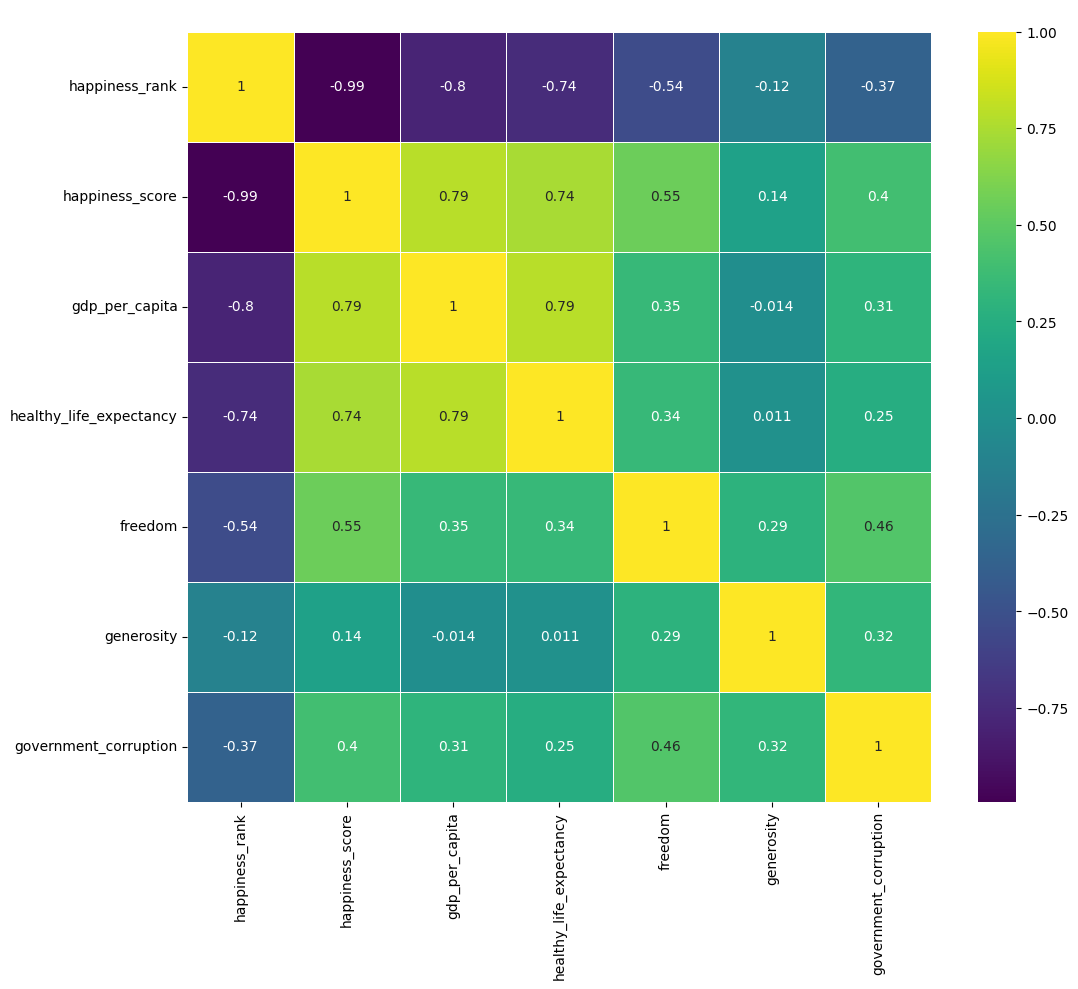

In [ ]:
final = df.drop(columns=['year'])

correlation_mat = final.select_dtypes(include=["int", "float"]).corr()

plt.figure(figsize=(12, 10), facecolor='white', edgecolor='black')
ax = plt.axes()
ax.set_facecolor('#292929')
sns.heatmap(correlation_mat, annot=True, cmap='viridis', linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Analysis', color='white')
plt.show()

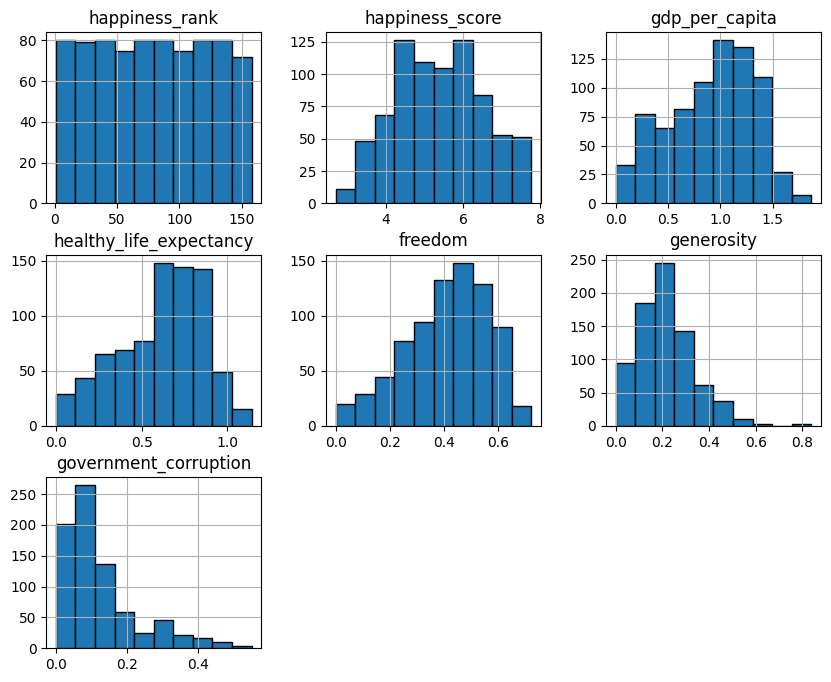

In [ ]:
final = df.drop(columns=['year'])
final.hist(figsize=(10, 8), edgecolor='black')
plt.show()


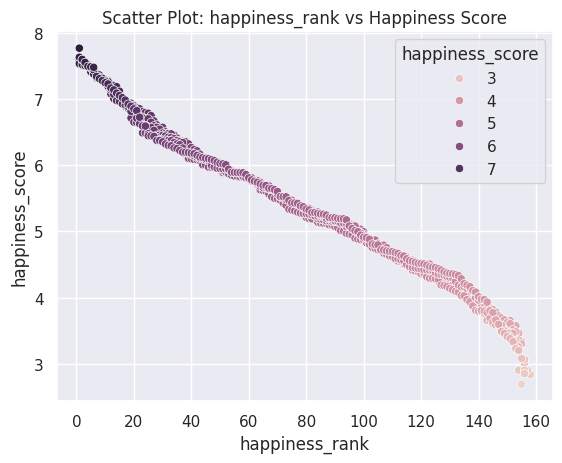

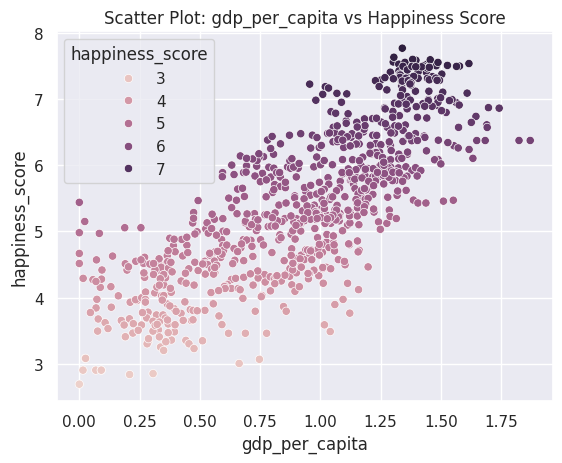

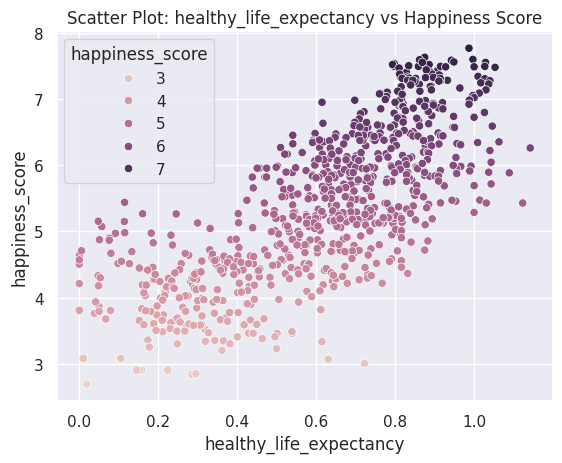

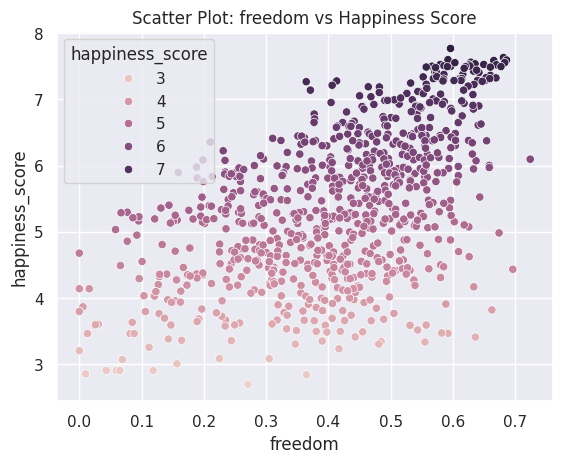

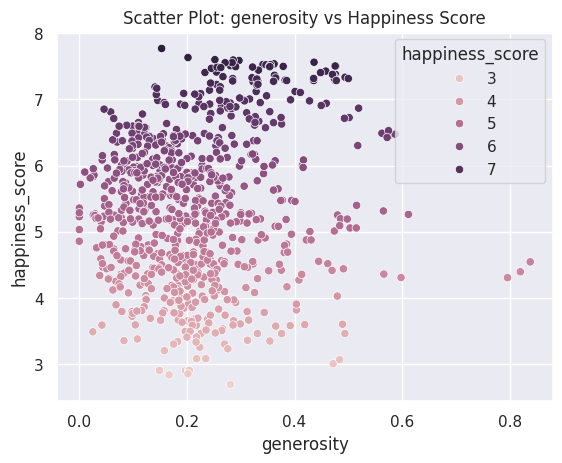

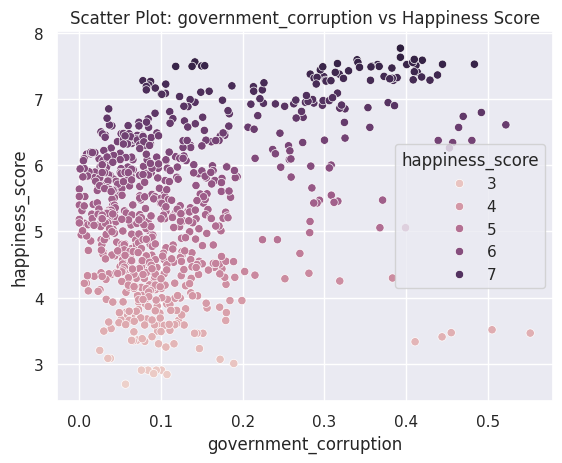

In [ ]:
plot_df = final.select_dtypes(include=['int', 'float'])
sc_df = plot_df.drop(columns=['happiness_score'])

sns.set(color_codes=True)
for variable in sc_df.columns:
    sns.scatterplot(x=variable, y='happiness_score', hue='happiness_score', data=df)
    plt.title(f'Scatter Plot: {variable} vs Happiness Score')
    plt.show()



It can be seen that Happiness Rank is inversely proportional to Happiness Score (HS), this makes sense because a country with a higher HS, is going to rank higher, therefore, having a smaller value for this variable. However, we have to keep in mind that this is a categorical variable.

Also, it is noticeable that both Government Corruption and Generosity seem to have a rather poor relation with Happiness Score, while the rest do seem to have a linear relationship with Happiness Score.


### Model Trained

In [ ]:
X = df.drop('happiness_score', axis = 1)
y = df['happiness_score']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     781 non-null    int64  
 1   happiness_rank           781 non-null    int64  
 2   country                  781 non-null    object 
 3   gdp_per_capita           781 non-null    float64
 4   healthy_life_expectancy  781 non-null    float64
 5   freedom                  781 non-null    float64
 6   generosity               781 non-null    float64
 7   government_corruption    781 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 48.9+ KB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(546, 8) (235, 8) (546,) (235,)


In [ ]:
X_test.to_csv('../Data/x_test.csv', index = False)
y_test.to_csv('../Data/y_test.csv', index = False)

In [ ]:
X_train['happiness_rank'].nunique()

158



Happiness Rank is an ordinal categorical variable, and it has a very high cardinality. In order to use it, I would have to apply one hot enconding to each one of this ranks, which would result in way too many columns, even if I group this rank into new categories. It also has a extremely high negative correlation with the Happiness Score, and adding this variable might result in multicolineality problems.

For all these reasons, I'm going to drop it later on.


In [ ]:
X_train['country'].nunique()

168

We can see that the Country variable has a very high cardinality, which will have to be fixed.

I will be importing Country converter to get the continents of each country easily. This will get me a lower cardinality variable which will be easier to handle.


In [ ]:
X_train['continent'] = X_train['country'].apply(continent)

In [ ]:
del_cols(X_train)

,year,gdp_per_capita,healthy_life_expectancy,freedom,generosity,government_corruption,continent
636,2019,1.034000,0.963000,0.558000,0.144000,0.093000,America
623,2018,0.024000,0.010000,0.305000,0.218000,0.038000,Africa
334,2017,1.252785,0.819480,0.376895,0.326662,0.082288,America
363,2017,1.281778,0.547349,0.373783,0.052264,0.032963,Europe
626,2019,1.383000,0.996000,0.592000,0.252000,0.410000,Europe
...,...,...,...,...,...,...,...
71,2015,1.386040,1.013280,0.596080,0.394780,0.371240,Asia
106,2015,0.881130,0.737930,0.262680,0.064310,0.063580,Africa
270,2016,0.932870,0.347450,0.486140,0.077950,0.103980,Africa
435,2017,0.900597,0.637524,0.198303,0.083488,0.026674,Asia


In [ ]:
X_train = dummies(X_train)
X_train.head()

,year,gdp_per_capita,healthy_life_expectancy,freedom,generosity,government_corruption,continent_Africa,continent_America,continent_Asia,continent_Europe,continent_Oceania
636,2019,1.034000,0.963000,0.558000,0.144000,0.093000,False,True,False,False,False
623,2018,0.024000,0.010000,0.305000,0.218000,0.038000,True,False,False,False,False
334,2017,1.252785,0.819480,0.376895,0.326662,0.082288,False,True,False,False,False
363,2017,1.281778,0.547349,0.373783,0.052264,0.032963,False,False,False,True,False
626,2019,1.383000,0.996000,0.592000,0.252000,0.410000,False,False,False,True,False


In [ ]:
X_test['continent'] = X_test['country'].apply(continent)
del_cols(X_test)
X_test = dummies(X_test)
X_test.head()

,year,gdp_per_capita,healthy_life_expectancy,freedom,generosity,government_corruption,continent_Africa,continent_America,continent_Asia,continent_Europe,continent_Oceania
595,2018,0.308,0.391,0.452,0.220,0.146,True,False,False,False,False
587,2018,0.874,0.365,0.519,0.051,0.064,True,False,False,False,False
543,2018,0.652,0.424,0.334,0.216,0.113,False,False,True,False,False
645,2019,1.503,0.825,0.598,0.262,0.182,False,False,True,False,False
487,2018,1.398,0.819,0.547,0.291,0.133,False,True,False,False,False


In [ ]:
linear_reg_model = LinearRegression() # creatinng model

linear_reg_model.fit(X_train, y_train) # training lr model

y_pred_linear = linear_reg_model.predict(X_test) # predictions with lr model with test data

# comparing metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Model Results:")
print("Mean Squared Error (MSE):", mse_linear)
print("Coefficient of determination (R^2):", r2_linear)

Linear Regression Model Results:
Mean Squared Error (MSE): 0.2822511119026803
Coefficient of determination (R^2): 0.7739624406676491


In [ ]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42) # creatinng model

random_forest_model.fit(X_train, y_train) # training rf model

y_pred_rf = random_forest_model.predict(X_test) # predicting rf model with test daata

# comparing metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Model Results:")
print("Mean Squared Error (MSE):", mse_rf)
print("Coefficient of determination (R^2):", r2_rf)

Random Forest Regression Model Results:
Mean Squared Error (MSE): 0.1977796540237493
Coefficient of determination (R^2): 0.8416104369624611


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Crear el modelo de regresión de Gradient Boosting
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Entrenar el modelo
gradient_boosting_model.fit(X_train, y_train)

# Predecir con el modelo entrenado
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)

# Calcular métricas
mse_gradient_boosting = mean_squared_error(y_test, y_pred_gradient_boosting)
r2_gradient_boosting = r2_score(y_test, y_pred_gradient_boosting)

print("Gradient Boosting Regression Model Results:")
print("Mean Squared Error (MSE):", mse_gradient_boosting)
print("Coefficient of determination (R^2):", r2_gradient_boosting)


Gradient Boosting Regression Model Results:
Mean Squared Error (MSE): 0.21495444539869402
Coefficient of determination (R^2): 0.8278562026628513
